In [ ]:
# Template from https://mne.discourse.group/t/eeg-data-csv-file-preprocessing/4040/4
# Another usefull link for creating mne data strcutures https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html
import pandas as pd
import mne
dataframe = pd.read_csv('Data.csv', skip_rows=1) 

#From the link above - there is more info on how to define channel type etc for info structure
n_channels = len(dataframe.columns)    
sampling_freq = ???  # in Hertz - This is in the first line of the CSV
info = mne.create_info(n_channels, sfreq=sampling_freq)
raw = mne.io.RawArray(dataframe.values, info)  

#...preprocessing ...
raw.save('Data.fif')

# Start of data Analysis

In [3]:
import pandas as pd
import mne

In [16]:
dataframe

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.757698e+09,-404.785,-57.617,-690.430,-246.094,0.0
1,1.757698e+09,-2.930,-19.531,-71.289,-56.152,0.0
2,1.757698e+09,399.414,-7.324,344.727,198.730,0.0
3,1.757698e+09,-50.781,-44.922,-188.965,3.418,0.0
4,1.757698e+09,-425.293,-52.734,-562.012,-229.004,0.0
...,...,...,...,...,...,...
14131,1.757699e+09,-227.051,-54.688,-360.840,-148.438,0.0
14132,1.757699e+09,321.289,-9.766,345.215,125.000,0.0
14133,1.757699e+09,208.984,-37.109,117.676,115.234,0.0
14134,1.757699e+09,-348.145,-65.430,-547.852,-169.922,0.0


In [17]:
csvPath = "/Users/user/projects/museExperiments/museData/data_09-12-2003_1102/EEG_recording_2025-09-12-17.34.03.csv"

In [8]:
dataframe = pd.read_csv(csvPath)
# n_channels = len(dataframe.columns)    

In [20]:
# dropping RightAux since it is only needed if adding costum channels and renameing the columns to match MNE
dataframe = dataframe.drop("Right AUX", axis=1)


In [21]:
dataframe

,timestamps,TP9,AF7,AF8,TP10
0,1.757698e+09,-404.785,-57.617,-690.430,-246.094
1,1.757698e+09,-2.930,-19.531,-71.289,-56.152
2,1.757698e+09,399.414,-7.324,344.727,198.730
3,1.757698e+09,-50.781,-44.922,-188.965,3.418
4,1.757698e+09,-425.293,-52.734,-562.012,-229.004
...,...,...,...,...,...
14131,1.757699e+09,-227.051,-54.688,-360.840,-148.438
14132,1.757699e+09,321.289,-9.766,345.215,125.000
14133,1.757699e+09,208.984,-37.109,117.676,115.234
14134,1.757699e+09,-348.145,-65.430,-547.852,-169.922


# Creating the MNE object

In [70]:
ch_names = list(dataframe.columns.drop("timestamps")) # tp9 af7 af8 tp10
ch_types = ["eeg"]*len(ch_names) # 4 eeg channels
sampleing_freq = 256 # muse 2 is at 256hz
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage("standard_1020")
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: TP9, AF7, AF8, TP10
 chs: 4 EEG
 custom_ref_applied: False
 dig: 7 items (3 Cardinal, 4 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 4
 projs: []
 sfreq: 256.0 Hz
>


In [71]:
sampling_freq = 256  
formatedDataFrame = dataframe.drop("timestamps", axis=1)
# print(formatedDataFrame.values)
print(formatedDataFrame.shape)
# need to transpse the dataframe as current in samples x channels and we want channels x samples
print(formatedDataFrame.values.T.shape)

(14136, 4)
(4, 14136)


In [72]:
raw = mne.io.RawArray(formatedDataFrame.values.T, info)  

Creating RawArray with float64 data, n_channels=4, n_times=14136
    Range : 0 ... 14135 =      0.000 ...    55.215 secs
Ready.


In [78]:
# Doing analysis on the raw MNE object 
l_freq = 1     # Lower cutoff (Muse is not good below 1 Hz)
h_freq = 50    # Upper cutoff (for clean gamma, avoids muscle/noise)
# note the total cuttoff is 128hz but after 50hz its mostly noise/muslce artifacts
raw.filter(l_freq=l_freq, h_freq=h_freq)  # In-place bandpass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



<RawArray | 4 x 14136 (55.2 s), ~454 kB, data loaded>

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/Users/user/py-neuro-env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


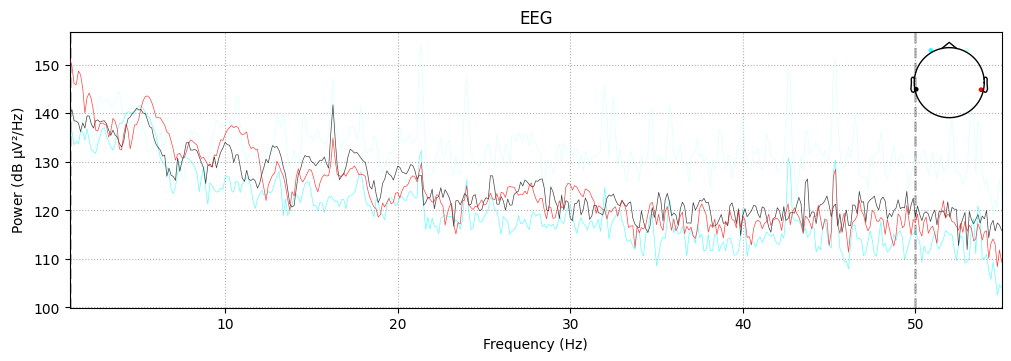

In [81]:
raw.compute_psd(fmin=l_freq, fmax=h_freq+5).plot()

# Now lets create epochs and see how it changed over epochs ... 

Effective window size : 8.000 (s)


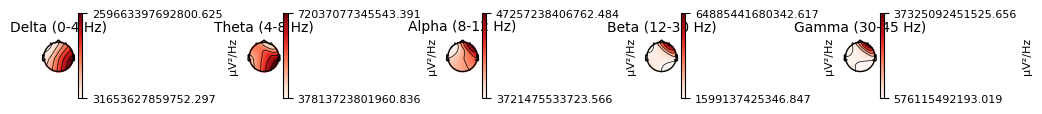

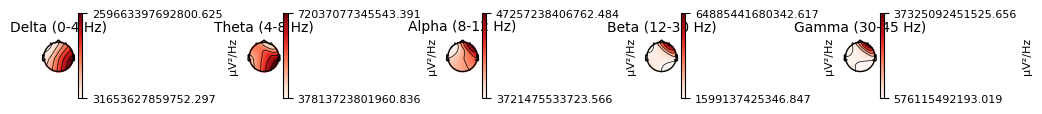

In [85]:
raw.compute_psd(fmin=l_freq, fmax=h_freq+5).plot_topomap()

In [ ]:
#